In [12]:
import sklearn
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()


In [13]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [14]:
bc.target[500]

1

In [15]:
bc.target.shape

(569,)

In [16]:
bc.data[500]



array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [17]:
bc.data.shape

(569, 30)

# Preprocessing

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split (bc.data, bc.target, test_size=0.2)
from sklearn.model_selection import train_test_split


print(f"Features=> train: {X_train.shape} - test: {X_test.shape}")
print(f"Labels=> train: {y_train.shape} - test: {y_test.shape}")



Features=> train: (455, 30) - test: (114, 30)
Labels=> train: (455,) - test: (114,)


In [19]:
X_train[0]


array([1.096e+01, 1.762e+01, 7.079e+01, 3.656e+02, 9.687e-02, 9.752e-02,
       5.263e-02, 2.788e-02, 1.619e-01, 6.408e-02, 1.507e-01, 1.583e+00,
       1.165e+00, 1.009e+01, 9.501e-03, 3.378e-02, 4.401e-02, 1.346e-02,
       1.322e-02, 3.534e-03, 1.162e+01, 2.651e+01, 7.643e+01, 4.075e+02,
       1.428e-01, 2.510e-01, 2.123e-01, 9.861e-02, 2.289e-01, 8.278e-02])

In [20]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))

X_train= scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [21]:
X_train[0]

array([0.18831937, 0.30900555, 0.18658006, 0.09420997, 0.39938612,
       0.23967855, 0.12331303, 0.13856859, 0.24132408, 0.29738837,
       0.01419518, 0.27024399, 0.01922443, 0.00614123, 0.36027201,
       0.23678914, 0.11113636, 0.25497253, 0.07511116, 0.09117919,
       0.13127001, 0.40438419, 0.12958813, 0.05463527, 0.47302384,
       0.21704456, 0.16956869, 0.33968309, 0.14271634, 0.18194936])

# classification

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train, acc_test, p, r  



# 1. Naive bays


In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)





GaussianNB()

In [24]:

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics (y_train, y_test, y_pred_train, y_pred_test)



acc train: 0.9406593406593406 - acc test: 0.9210526315789473 - precision: 0.972972972972973 - recall: 0.9113924050632911


# 2. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)



acc train: 0.9758241758241758 - acc test: 0.9736842105263158 - precision: 1.0 - recall: 0.9620253164556962


# 3. Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion="gini")
dt.fit(X_train, y_train)


y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train: 1.0 - acc test: 0.9473684210526315 - precision: 1.0 - recall: 0.9240506329113924


# 4. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train: 0.9978021978021978 - acc test: 0.956140350877193 - precision: 1.0 - recall: 0.9367088607594937


# 5. SVM

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train: 0.9846153846153847 - acc test: 0.9912280701754386 - precision: 1.0 - recall: 0.9873417721518988


# 6. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)



acc train: 0.9714285714285714 - acc test: 1.0 - precision: 1.0 - recall: 1.0


# 7. ANN

In [30]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

print(f"acc train: {acc_train_ann} acc test: {acc_test_ann} - precision: {p_ann} - recall: {r_ann}")

acc train: 0.9802197802197802 - acc test: 0.9824561403508771 - precision: 0.9873417721518988 - recall: 0.9873417721518988
acc train: 0.9802197802197802 acc test: 0.9824561403508771 - precision: 0.9873417721518988 - recall: 0.9873417721518988


# Comparison

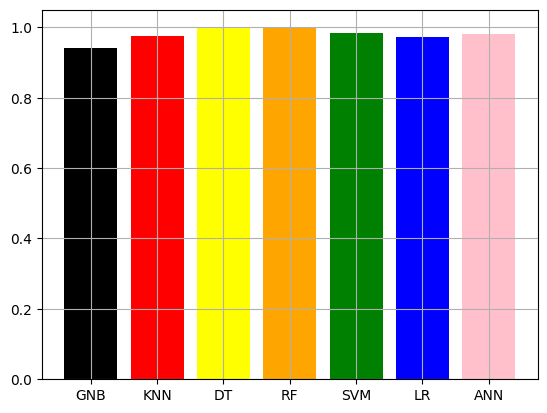

In [31]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

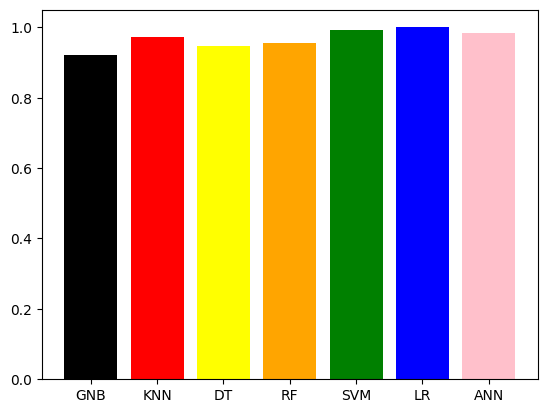

In [32]:

acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, acc_test, color=colors)
plt.show()

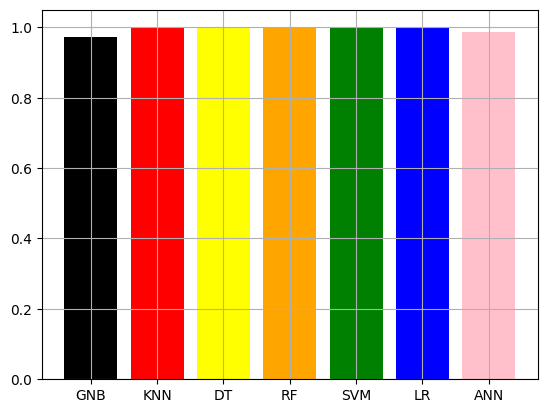

In [33]:

p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]

title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

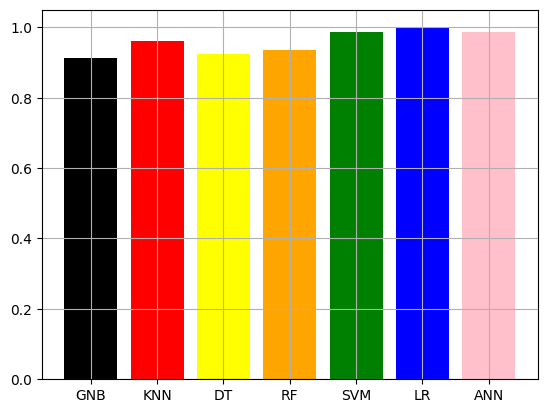

In [34]:

 r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann ]

title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title,r , color=colors)
plt.grid()
plt.show()